## Boundary to field inference with hypernetworks



In [1]:
import jax
import jax.numpy as jnp

In [2]:
@jax.jit
def mode(theta, n=1):
    return jnp.sin(n * theta)


@jax.jit
def boundary(n, theta, R=1.0):
    x = R * jnp.cos(theta)
    y = R * jnp.sin(theta)
    z = jax.vmap(mode, in_axes=(0, None))(theta, n)
    return x, y, z


res = 1000
theta = jnp.linspace(0, 2 * jnp.pi, res)
x, y, z = boundary(n=3, theta=theta)

Platform 'METAL' is experimental and not all JAX functionality may be correctly supported!


Metal device set to: Apple M3

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2024-02-08 13:00:24.057148: W pjrt_plugin/src/mps_client.cc:563] WARNING: JAX Apple GPU support is experimental and not all JAX functionality is correctly supported!


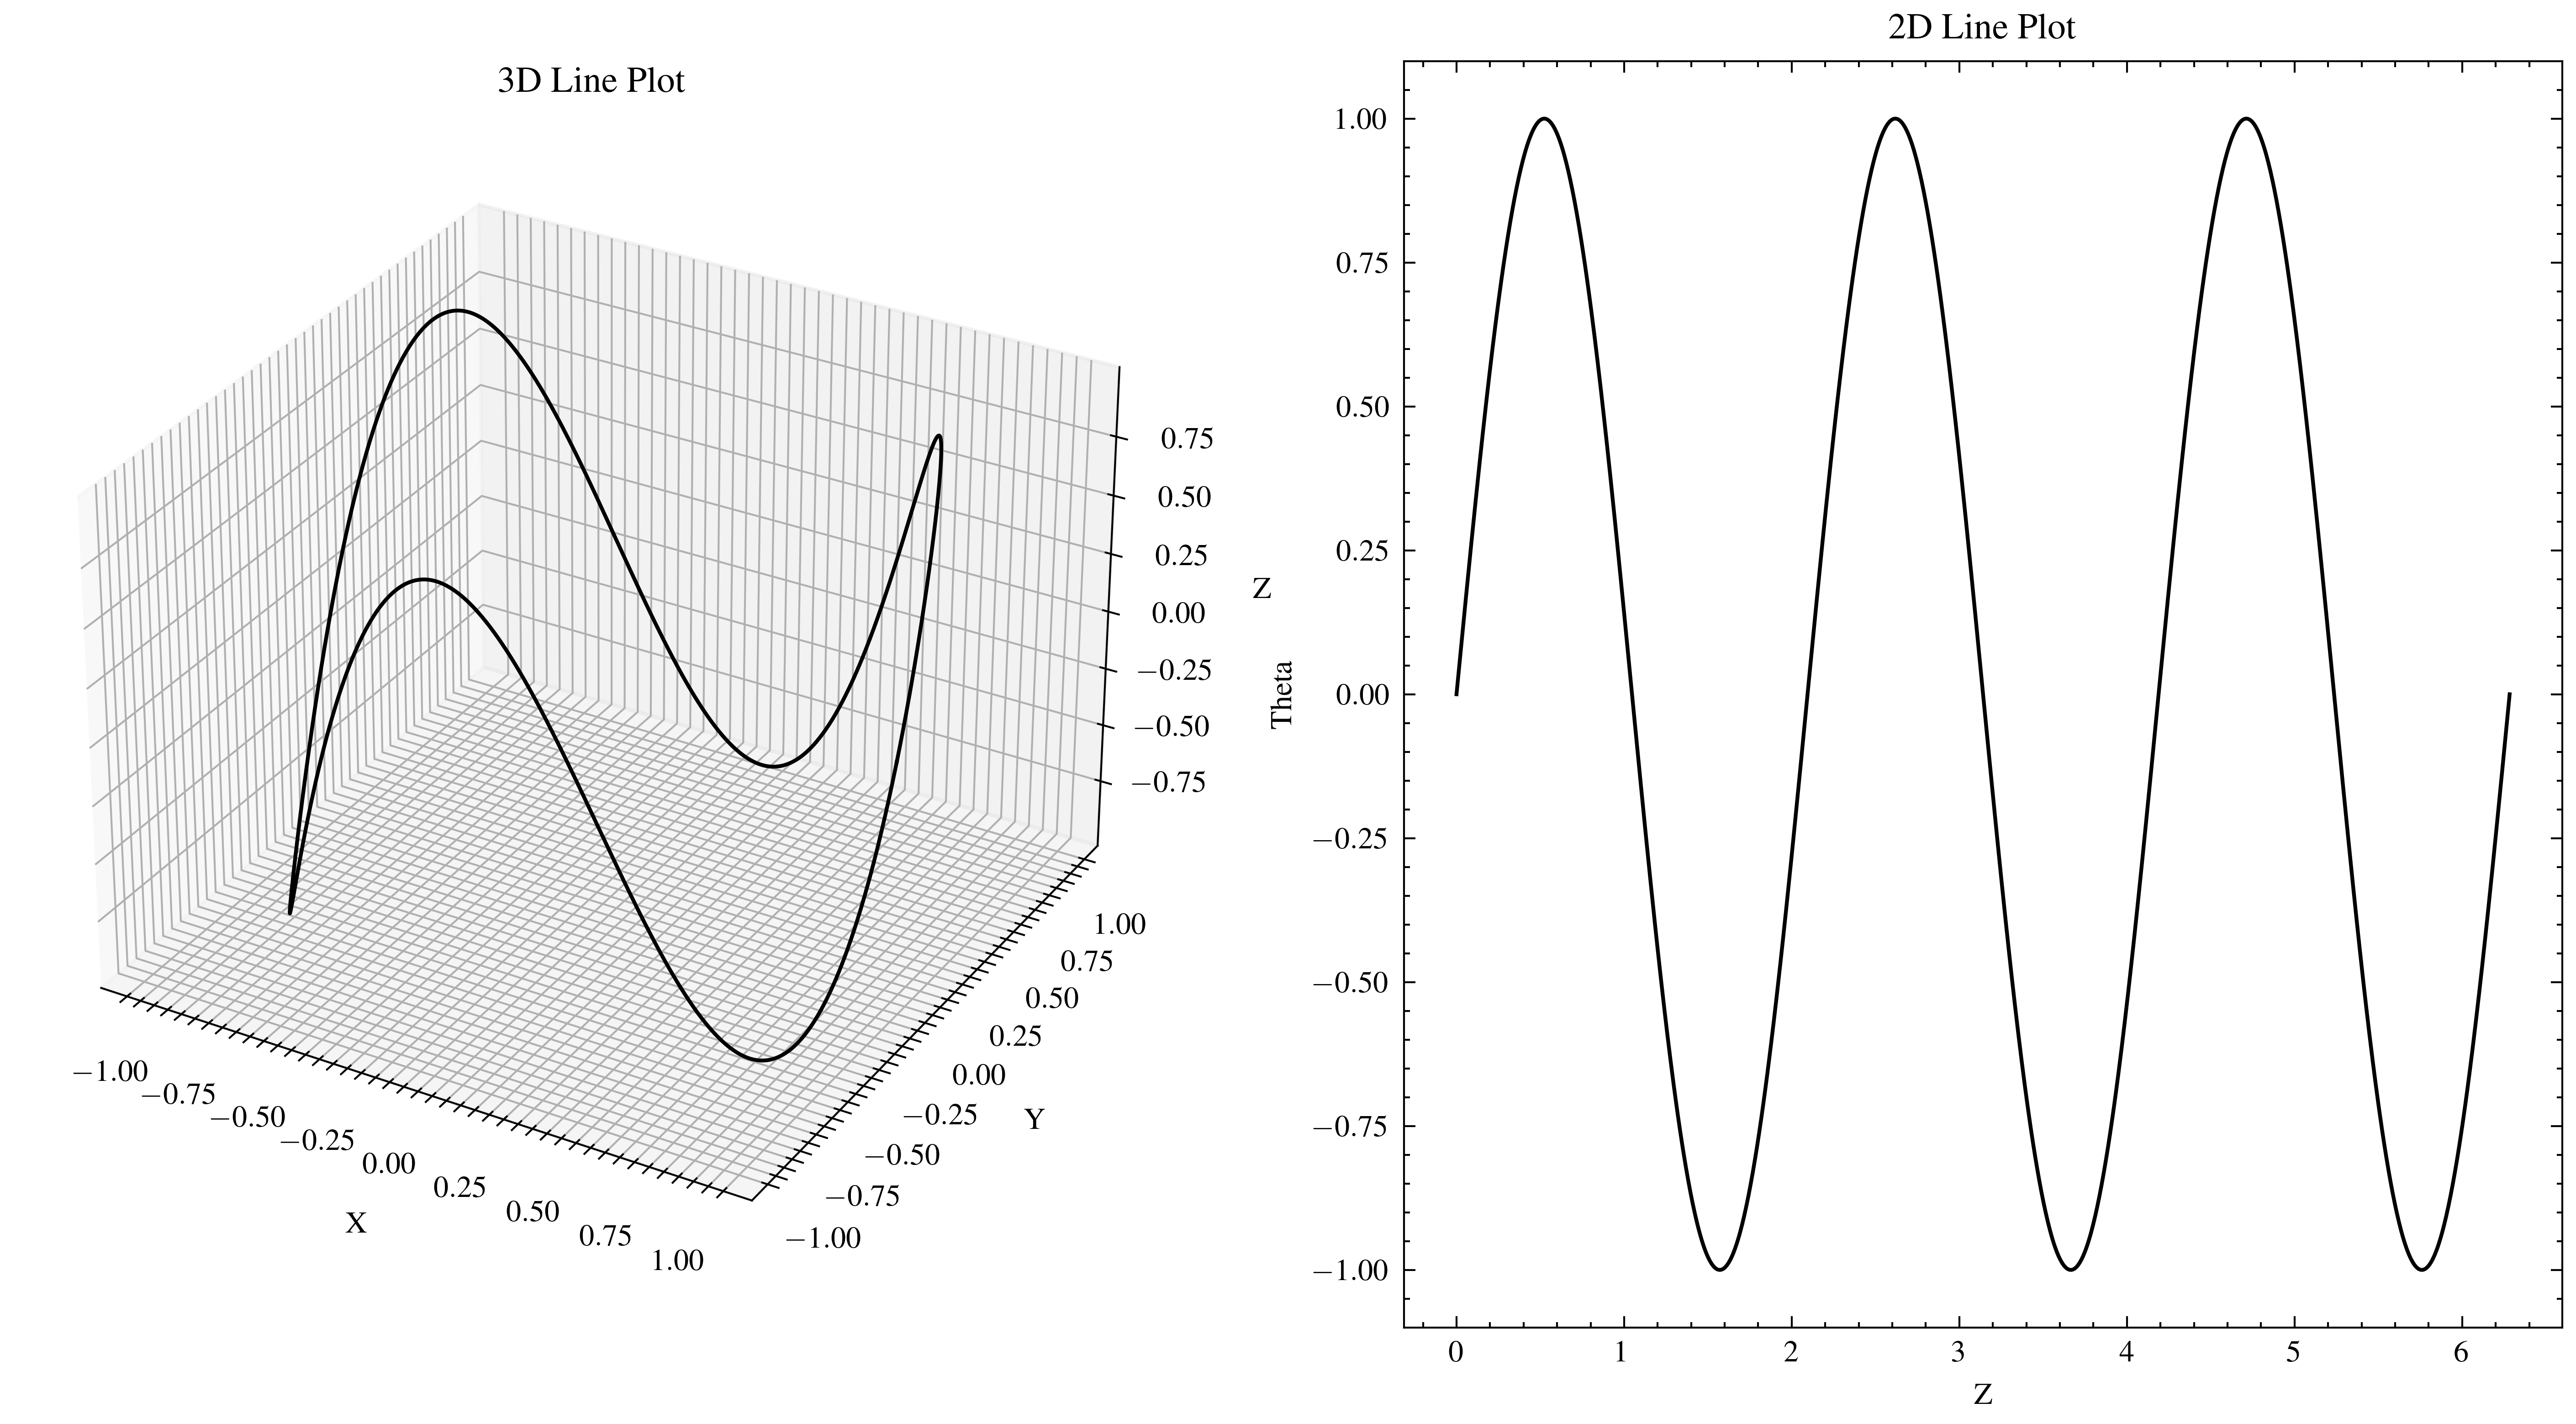

In [3]:
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(["science", "ieee"])

fig = plt.figure(figsize=(12, 6))

# Left subplot: 3D line plot
ax1 = fig.add_subplot(121, projection="3d")
ax1.plot(x, y, z)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.set_title("3D Line Plot")

# Right subplot: 2D line plot
ax2 = fig.add_subplot(122)
ax2.plot(theta, z)
ax2.set_xlabel("Z")
ax2.set_ylabel("Theta")
ax2.set_title("2D Line Plot")

# plt.tight_layout()
plt.show()

## PyVista interactive plotting

In [ ]:
import numpy as np
import pyvista as pv

x, y, z = boundary(n=4)

# Create a PyVista mesh
points = np.array(jnp.column_stack((x, y, z)))
spline = pv.Spline(points, 1000)

p = pv.Plotter(notebook=True)  # type: ignore
p.add_mesh(spline, render_lines_as_tubes=True, line_width=10)
# p.show_bounds()
p.show_axes()
p.camera_position = "xz"
p.show()